<a href="https://colab.research.google.com/github/YashDhruv2004/yolov8/blob/main/First_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
import tensorflow_datasets as tfds
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.optimizers import Adam,SGD

import os
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
os.listdir('/content/gdrive/MyDrive/NEW DATASET')


['no fire', 'Fire']

In [ ]:
base='/content/gdrive/MyDrive/NEW DATASET'


training=ImageDataGenerator(rescale=1/255,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.4,validation_split=0.03)
train_datagen = training.flow_from_directory(base,
                                                  target_size=(256,256),
                                                  subset='training',
                                                  class_mode="binary",
                                                 color_mode="rgb",
                                                  batch_size= 32)
test_datagen = training.flow_from_directory(base,
                                                  target_size=(256,256),
                                                  subset='validation',
                                                  class_mode="binary",
                                                 color_mode="rgb",
                                                  batch_size= 32)

Found 1193 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [ ]:
model=tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),



    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),

    layers.Dense(1, activation='sigmoid')
])
model.compile(metrics=keras.metrics.BinaryAccuracy(),optimizer=keras.optimizers.Adam(learning_rate=1e-3),loss=BinaryCrossentropy())
hist=model.fit(train_datagen,epochs=14,validation_data=test_datagen,verbose=1,batch_size=32)
result=model.evaluate(test_datagen)


Epoch 1/14
38/38 [==============================] - 457s 12s/step - loss: 0.6870 - binary_accuracy: 0.6647 - val_loss: 1.2337 - val_binary_accuracy: 0.5278
Epoch 2/14
38/38 [==============================] - 309s 8s/step - loss: 0.5283 - binary_accuracy: 0.7510 - val_loss: 1.5426 - val_binary_accuracy: 0.5278
Epoch 3/14
38/38 [==============================] - 287s 7s/step - loss: 0.5466 - binary_accuracy: 0.7469 - val_loss: 0.9326 - val_binary_accuracy: 0.6111
Epoch 4/14
38/38 [==============================] - 287s 7s/step - loss: 0.5023 - binary_accuracy: 0.7712 - val_loss: 1.3620 - val_binary_accuracy: 0.5556
Epoch 5/14
38/38 [==============================] - 287s 7s/step - loss: 0.5131 - binary_accuracy: 0.7561 - val_loss: 0.4188 - val_binary_accuracy: 0.8611
Epoch 6/14
38/38 [==============================] - 292s 8s/step - loss: 0.5136 - binary_accuracy: 0.7561 - val_loss: 0.4531 - val_binary_accuracy: 0.8611
Epoch 7/14
38/38 [==============================] - 276s 7s/step - lo

In [ ]:
result=model.evaluate(test_datagen)

2/2 [==============================] - 2s 101ms/step - loss: 0.4790 - binary_accuracy: 0.8333


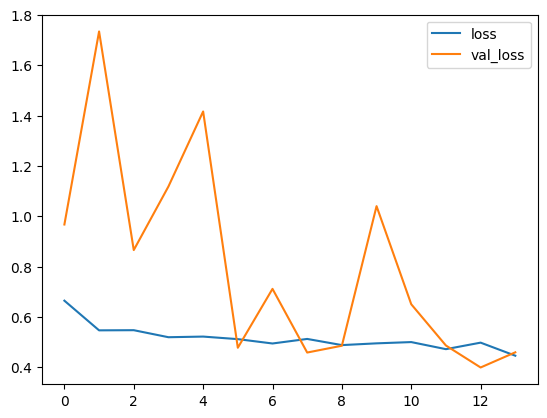

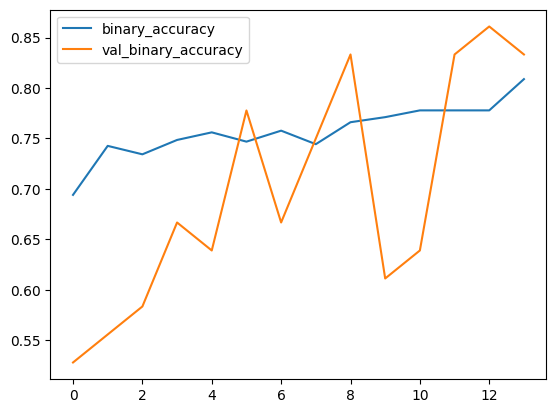

In [ ]:
histogram=pd.DataFrame(hist.history)
histogram.loc[:, ['loss', 'val_loss']].plot()
histogram.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
plt.show()

In [ ]:
from keras.preprocessing import image
test=image.load_img('/content/gdrive/MyDrive/Bonfire.jpg',target_size=(256,256))
plt.imshow(test)
test = image.img_to_array(test)
test = np.expand_dims(test,axis=0)

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Bonfire.jpg'

In [ ]:
res=model.predict(test)

if (res==1):
  print("fire")
else:
  print("no fire")

1/1 [==============================] - 0s 18ms/step
[[1.]]
fire
